In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [5]:
df.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

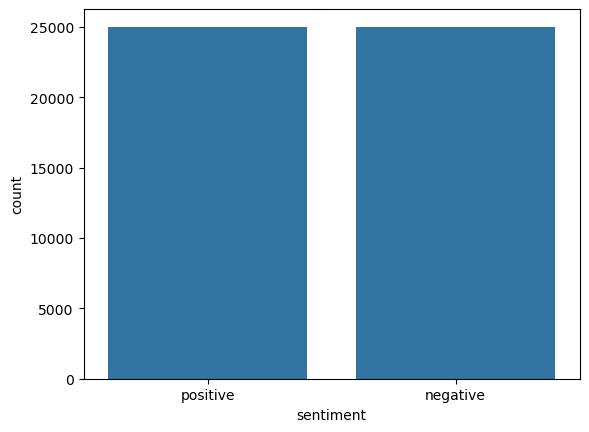

In [6]:
#DATA VISUALIZATION

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df , x='sentiment')
plt.show()

In [8]:
#Data Preprocessing

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
df['sentiment']= df['sentiment'].map({'positive':1 , 'negative':0})

In [10]:
xtrain, xtest, ytrain,ytest = train_test_split(df['review'], df['sentiment'],test_size=0.2 , random_state=42)

In [14]:
#tokenize and pad
vocab_size = 10000
max_length = 300

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(xtrain)

In [16]:
actual_vocab_size = len(tokenizer.word_index)+1
print('Actual vocab size : ', actual_vocab_size)

Actual vocab size :  112282


In [19]:
xtrain_seq= tokenizer.texts_to_sequences(xtrain)
xtest_seq = tokenizer.texts_to_sequences(xtest)

xtrain_pad= pad_sequences(xtrain_seq , maxlen=max_length, padding='post', truncating='post')
xtest_pad = pad_sequences(xtest_seq , maxlen=max_length , padding='post', truncating='post')

In [22]:
#Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding , GlobalAveragePooling1D, Dense , Dropout
model = Sequential()
model.add(Embedding(input_dim=actual_vocab_size, output_dim=64, input_shape=(max_length,)))
model.add(GlobalAveragePooling1D())
model.add(Dense(64,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])
model.summary()

C:\Users\tanis\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 300, 64)             │       7,186,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,190,273 (27.43 MB)

 Trainable params: 7,190,273 (27.43 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
#Model Training
history = model.fit(xtrain_pad, ytrain ,epochs=10 ,validation_data=(xtest_pad, ytest), batch_size=32)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 57ms/step - accuracy: 0.6748 - loss: 0.5712 - val_accuracy: 0.8553 - val_loss: 0.3250
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 71s 57ms/step - accuracy: 0.8799 - loss: 0.2903 - val_accuracy: 0.8525 - val_loss: 0.3357
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.8994 - loss: 0.2605 - val_accuracy: 0.8904 - val_loss: 0.2622
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.9164 - loss: 0.2257 - val_accuracy: 0.8895 - val_loss: 0.2671
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.9217 - loss: 0.2086 - val_accuracy: 0.8806 - val_loss: 0.2907
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 71s 56ms/step - accuracy: 0.9246 - loss: 0.2008 - val_accuracy: 0.8783 - val_loss: 0.3031
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 57ms/step - accuracy: 0.9257 - loss: 0.1987 - val_accuracy: 0.8784 - val_loss: 0.3064
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.9320 -

In [24]:
loss,accuracy = model.evaluate(xtest_pad , ytest)
print("Accuracy : ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8873 - loss: 0.3265
Accuracy :  0.8826000094413757


In [32]:
#Model testing
def predict_sentiment(review_text):
    seq= tokenizer.texts_to_sequences([review_text])
    pad = pad_sequences(seq,maxlen=max_length , padding='post', truncating='post')
    pred= model.predict(pad)[0][0]
    sentiment = "Positive" if pred>0.5 else "Negative"
    return f"Predicted Sentiment: {sentiment} (Confidence: {pred:.2f})"

In [33]:
print (predict_sentiment(df['review'][99]))
df['review'][99]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted Sentiment: Positive (Confidence: 1.00)


"I have been a Mario fan for as long as I can remember, I have very fond memories of playing Super Mario World as a kid, this game has brought back many of those memories while adding something new. Super Mario Galaxy is the latest installment in the amazing Mario franchise. There is much very different about this game from any other Mario before it, while still keeping intact the greatest elements of Mario, the first noticeable difference is that the story takes place in space.<br /><br />The story begins much like any other Mario game, Mario receives a letter from Princess Peach inviting him to a celebration at her castle in the Mushroom Kingdom. Upon arriving at Peach's castle Mario finds Bowser and his son (Bowser Jr.) attacking the castle with their airships. Bowser kidnaps Princess Peach and then lifts her castle up into space. In the midst of the castle being lifted into space Mario falls off and lands on an unknown planet. Mario is found by a talking star named Luma and is take